In [ ]:
# Import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from tqdm.auto import trange, tqdm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr

# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data
fatigue_df = pd.read_csv('/content/drive/MyDrive/Datasets/Carbon_Bending_UC.csv')
fatigue_df

# Removing rows with null values
fatigue_df = fatigue_df.dropna()

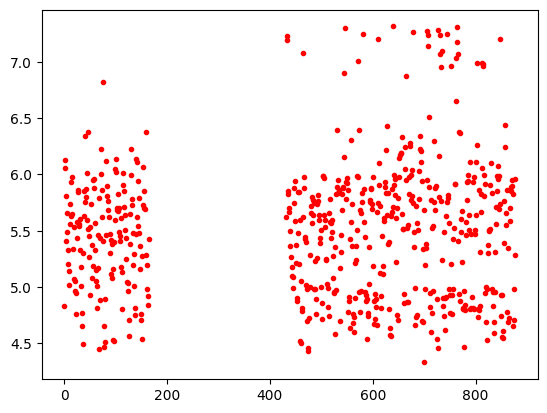

In [ ]:
# Scatter Plot for the Target Column
plt.plot(np.log10(fatigue_df['Number of Cycles']), 'r.')

# Sort the data by ascending order of number of cycles
fatigue_df.sort_values(by=['Number of Cycles'], ascending=True, ignore_index=True, inplace=True)

In [ ]:
# Remove columns that are not needed
drop_cols = ['Heat','Number of Cycles','Dataset'] # list the columns to drop along with target for independent feautures

# Use all remaining columns as features
features = fatigue_df.drop(drop_cols, axis=1)

# Use log transform of the number of cycles as targets
targets = np.log10(fatigue_df['Number of Cycles'])

# Display the features
features

,Stress (Mpa),Temperature (°C),Reduction Ratio,dA,dB,dC,Frequency,Elongation,Reduction of Area,C,Si,Mn,P,S,Ni,Cr,Cu
0,460,650,1270,0.04,0.01,0.00,50.0,29,70,0.42,0.26,0.70,0.024,0.010,0.01,0.01,0.01
1,500,550,825,0.11,0.04,0.00,50.0,23,67,0.42,0.22,0.78,0.022,0.020,0.01,0.02,0.03
2,470,550,825,0.08,0.00,0.00,50.0,22,68,0.33,0.21,0.75,0.031,0.019,0.01,0.03,0.02
3,580,550,825,0.10,0.00,0.00,50.0,22,60,0.54,0.20,0.75,0.013,0.019,0.01,0.01,0.01
4,480,550,825,0.11,0.04,0.00,50.0,23,67,0.42,0.22,0.78,0.022,0.020,0.01,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,520,550,1270,0.08,0.01,0.00,50.0,19,58,0.54,0.26,0.76,0.022,0.021,0.02,0.12,0.01
607,480,550,825,0.10,0.00,0.00,50.0,22,60,0.54,0.20,0.75,0.013,0.019,0.01,0.01,0.01
608,450,600,1740,0.07,0.00,0.00,50.0,22,64,0.45,0.25,0.79,0.018,0.016,0.02,0.13,0.13
609,530,550,610,0.08,0.00,0.04,50.0,16,50,0.54,0.27,0.70,0.017,0.020,0.06,0.10,0.22


In [ ]:
# Convert the features into floats
features = features.astype('float64')

In [ ]:
# Custom dataset class for handling features and labels
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.features = data
        self.labels = targets

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]

        return feature, label

  0%|          | 0/3000 [00:00<?, ?it/s]

Run # 1 Fold # 1


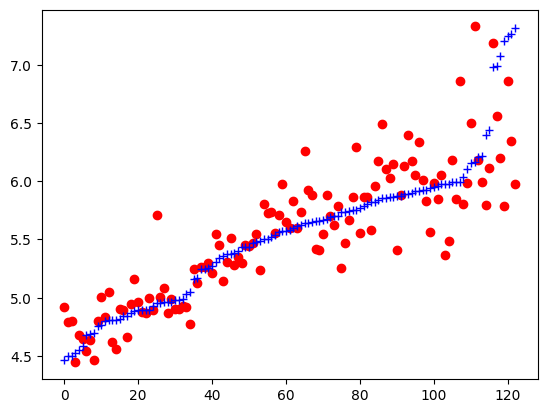

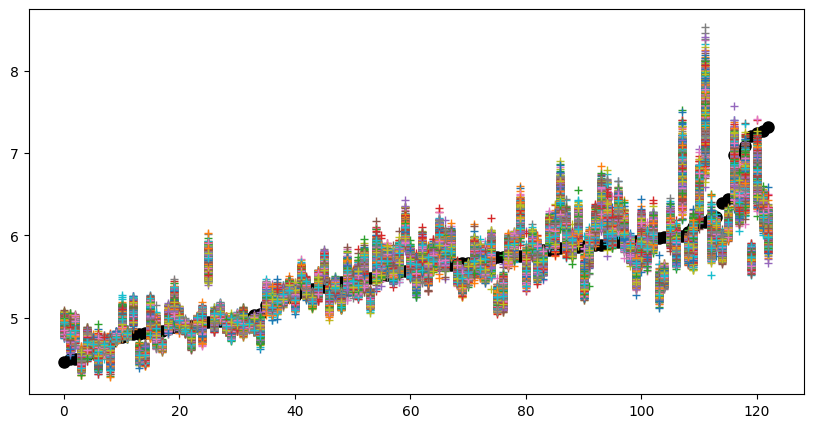

Pearson CC: 0.8433769046999923
R2 score: 0.7049009986662178
RMSE: 0.33373183012008667
MAE: 0.22063873708248138
MAPE: 0.0
Coverage: 47.967479674796735
Upper coverage: 73.17073170731705
Lower coverage: 74.79674796747965
Average Interval Width: 0.30718013644218445
Median Interval Width: 0.2772560119628906
Composite Metric: 1.2614498001792664


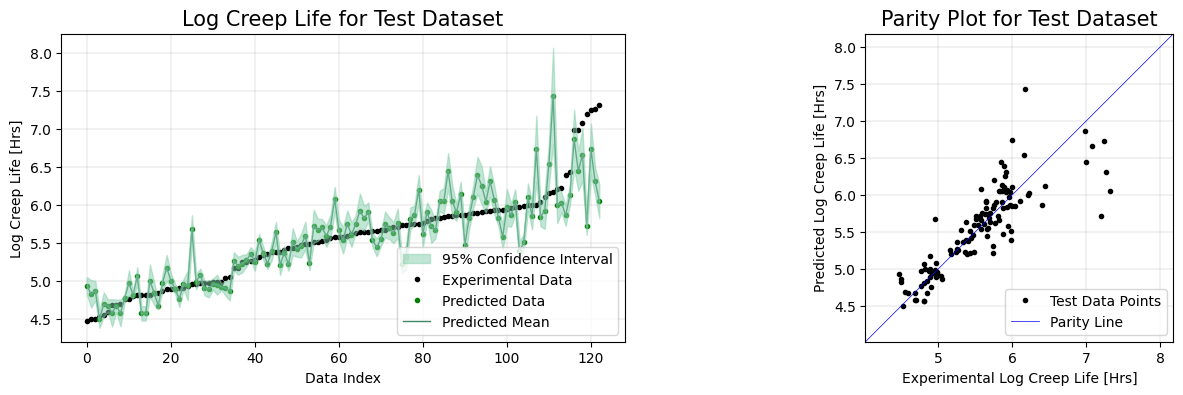

****************************************


  0%|          | 0/3000 [00:00<?, ?it/s]

Run # 1 Fold # 2


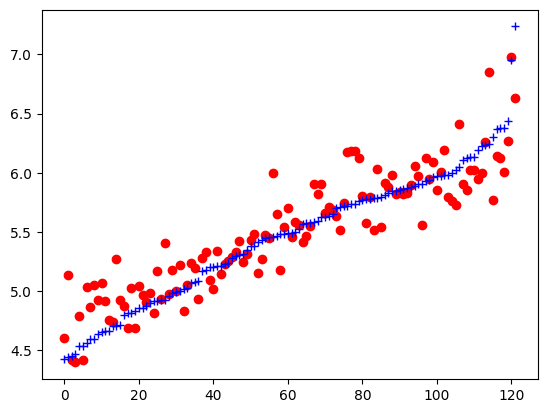

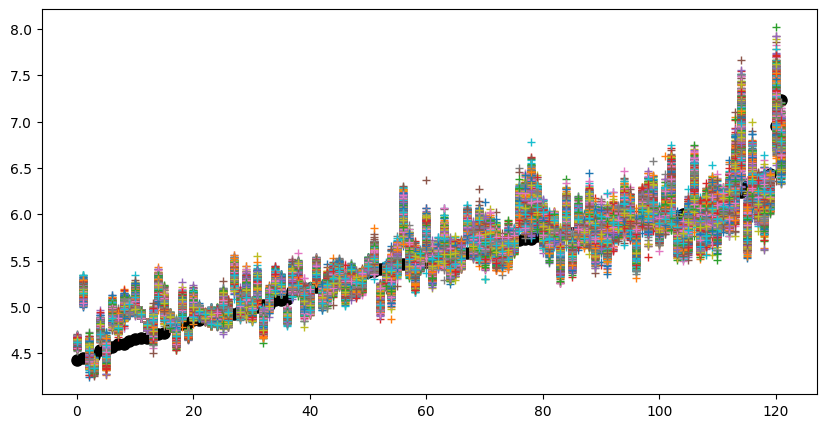

Pearson CC: 0.9303054244882026
R2 score: 0.8549921135395383
RMSE: 0.2138431817293167
MAE: 0.16359210014343262
MAPE: 0.0
Coverage: 59.83606557377051
Upper coverage: 72.95081967213117
Lower coverage: 86.88524590163938
Average Interval Width: 0.31770581007003784
Median Interval Width: 0.2752828598022461
Composite Metric: 1.3569272879786438


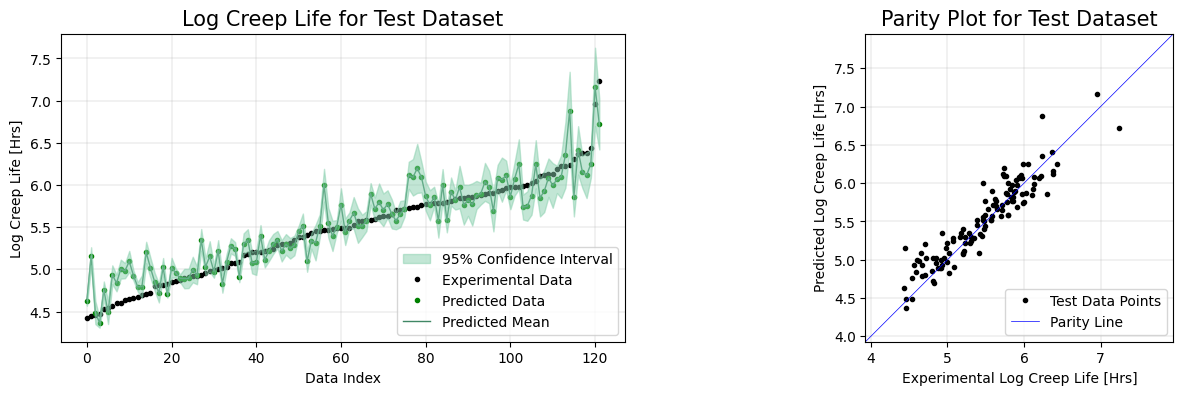

****************************************


  0%|          | 0/3000 [00:00<?, ?it/s]

Run # 1 Fold # 3


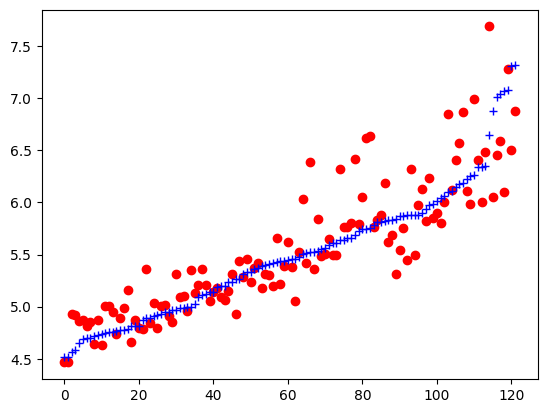

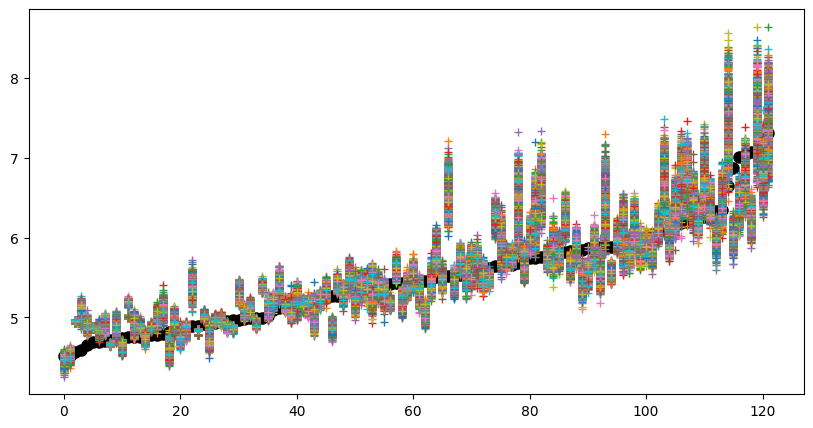

Pearson CC: 0.8926151368937356
R2 score: 0.7699340310922411
RMSE: 0.3014774024486542
MAE: 0.21428652107715607
MAPE: 0.0
Coverage: 44.262295081967224
Upper coverage: 65.5737704918033
Lower coverage: 78.68852459016396
Average Interval Width: 0.34109535813331604
Median Interval Width: 0.27284669876098633
Composite Metric: 1.2482326513086754


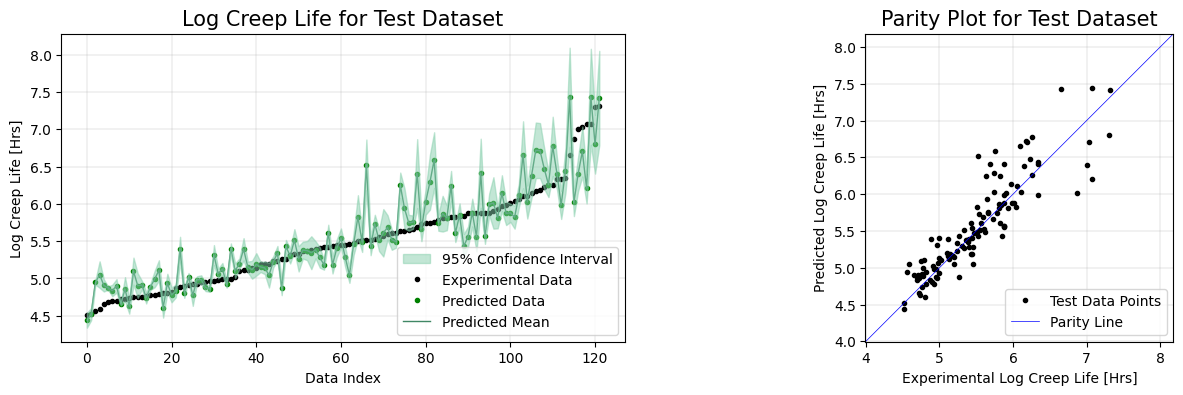

****************************************


  0%|          | 0/3000 [00:00<?, ?it/s]

Run # 1 Fold # 4


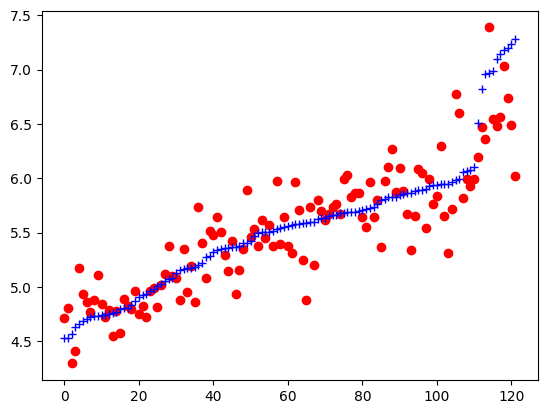

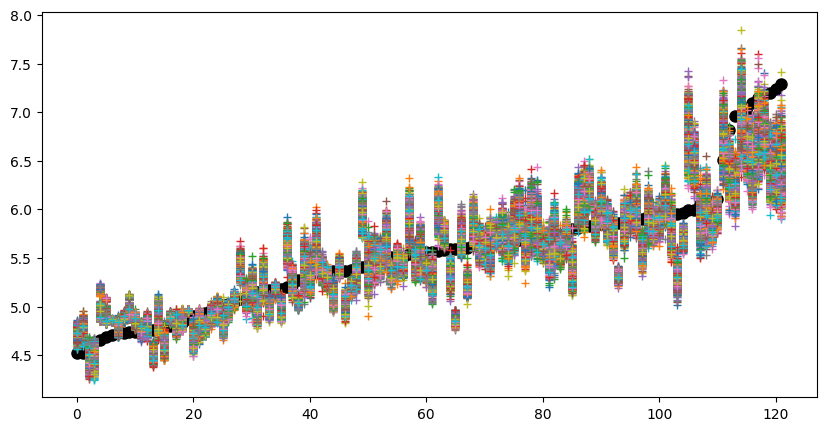

Pearson CC: 0.8978763394839062
R2 score: 0.80213002476981
RMSE: 0.2779938876628876
MAE: 0.20002008974552155
MAPE: 0.0
Coverage: 49.18032786885247
Upper coverage: 78.68852459016396
Lower coverage: 70.49180327868855
Average Interval Width: 0.32260218262672424
Median Interval Width: 0.29111766815185547
Composite Metric: 1.2276117421169737


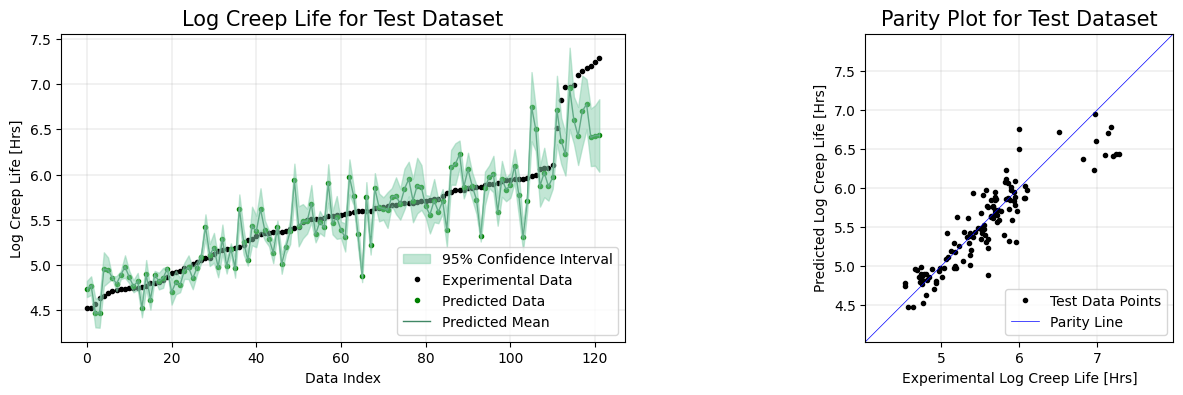

****************************************


  0%|          | 0/3000 [00:00<?, ?it/s]

Run # 1 Fold # 5


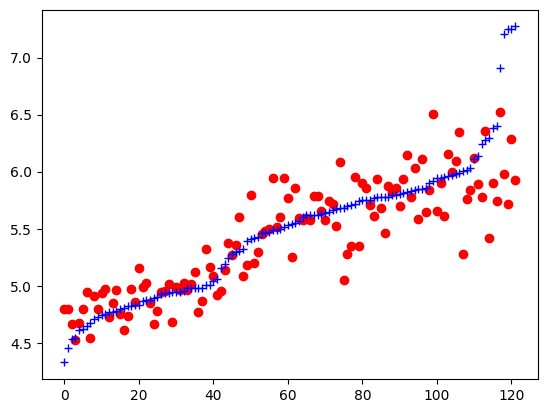

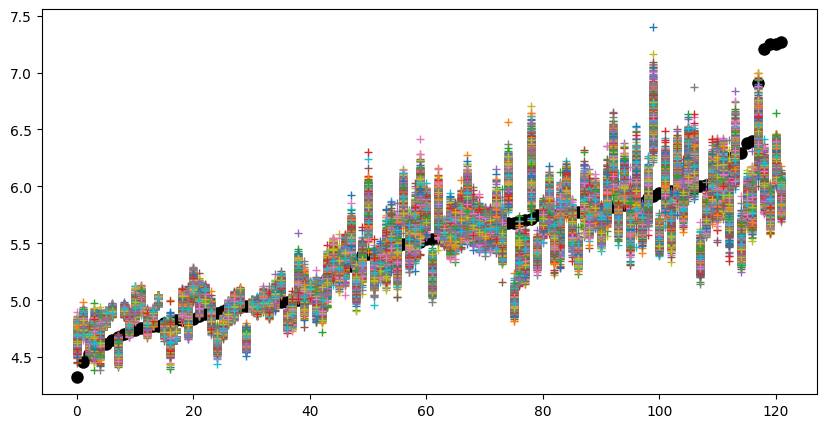

Pearson CC: 0.8431842479509447
R2 score: 0.7054631885910196
RMSE: 0.32491350173950195
MAE: 0.21074381470680237
MAPE: 0.0
Coverage: 49.18032786885247
Upper coverage: 75.4098360655738
Lower coverage: 73.77049180327872
Average Interval Width: 0.2958083152770996
Median Interval Width: 0.28731203079223633
Composite Metric: 1.238986575261537


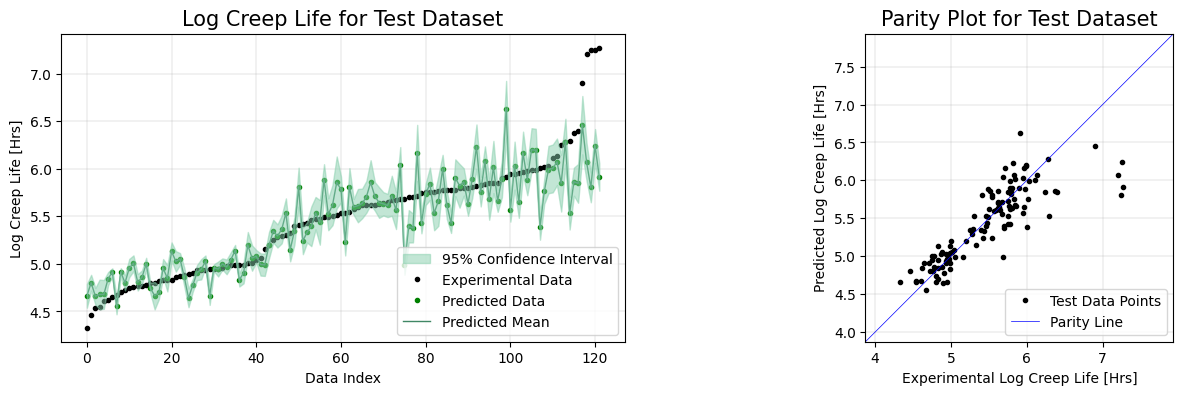

****************************************


In [ ]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
upper_coverage = np.zeros_like(PearsonCC)
lower_coverage = np.zeros_like(PearsonCC)
mean_interval_width = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=50+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            # normalized features to the [0,1] range
            scaler = MinMaxScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)

            x_train = x_train.astype(dtype=np.float32)
            x_test = x_test.astype(np.float32)
            y_train_np = y_train.to_numpy(dtype=np.float32)
            y_test_np =  y_test.to_numpy(dtype=np.float32)

            x_train = torch.from_numpy(x_train)
            y_train = torch.from_numpy(y_train_np)

            x_test = torch.from_numpy(x_test)
            y_test = torch.from_numpy(y_test_np)

            train_dataset = MyDataset(x_train, y_train)
            train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=32)

            # define DNN
            class MLP(nn.Module):
                def __init__(self, input_dim=17, output_dim=1, hidden_dim=10, n_hidden_layers=1, use_dropout=False):
                    super().__init__()

                    self.use_dropout = use_dropout
                    if use_dropout:
                        self.dropout = nn.Dropout(p=0.5)
                    self.activation = nn.ReLU()

                    # dynamically define architecture
                    self.layer_sizes = [input_dim] + n_hidden_layers * [hidden_dim] + [output_dim]
                    layer_list = [nn.Linear(self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                                range(1, len(self.layer_sizes))]
                    self.layers = nn.ModuleList(layer_list)

                def forward(self, input):
                    hidden = self.activation(self.layers[0](input))
                    for layer in self.layers[1:-1]:
                        hidden_temp = self.activation(layer(hidden))

                        if self.use_dropout:
                            hidden_temp = self.dropout(hidden_temp)
                        hidden = hidden_temp + hidden  # residual connection
                    output_mean = self.layers[-1](hidden).squeeze()
                    return output_mean

            def train(net, x_train, y_train):
                optimizer = torch.optim.Adagrad(params=net.parameters(), lr=0.01)
                criterion = nn.MSELoss()
                progress_bar = trange(3000)
                for _ in progress_bar:
                    for i, data in enumerate(train_dataloader):
                        traning_data, training_label = data
                        optimizer.zero_grad()
                        y_pred = net(torch.Tensor(traning_data))
                        loss = criterion(y_pred.squeeze(), torch.Tensor(training_label))
                        progress_bar.set_postfix(loss=f'{loss / features.shape[0]:.3f}')
                        loss.backward()
                        optimizer.step()
                return net

            # training
            net_dropout = MLP(hidden_dim=100, n_hidden_layers=3, use_dropout=True)
            net_dropout = train(net_dropout, x_train, y_train)
            print('Run #', j+1, "Fold #", i+1)
            y_pred_test = net_dropout(x_test)
            plt.plot(y_pred_test.detach().numpy(), 'ro', y_test, 'b+')
            plt.show()

            # inference
            n_dropout_samples = 1000

            # compute predictions
            y_preds = [net_dropout(x_test).clone().detach().numpy() for _ in range(n_dropout_samples)]
            y_preds = np.array(y_preds)

            # Plot the predictions
            fig, ax = plt.subplots(figsize=(10, 5))
            iteration_list = [ i for i in range(len(y_test))]
            ax.plot(iteration_list, y_test, 'ko', markersize=8)
            for idx in range(len(y_preds)):
                        ax.plot(iteration_list, y_preds[idx], '+')
            plt.legend(loc=4, fontsize=15, frameon=False)
            plt.show()

            # Mean and standard deviation
            y_pred = np.mean(y_preds, axis=0)
            y_std = np.std(y_preds, axis=0)
            y_test = y_test.detach().numpy()

            ## Metrics for evaluating the predictive accuracy of the model
            PearsonCC[j, i] = pearsonr(np.squeeze(y_test), np.squeeze(y_pred))[0]
            R2_score[j, i] = r2_score(y_test, y_pred)
            RMSE[j, i] = np.sqrt(mean_squared_error(y_pred, y_test))
            MAE[j, i] = np.mean(abs(y_pred-np.array(y_test)))

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')
            print(f'MAPE: {MAPE[j, i]}')

            ## Metrics for evaluating the uncertainty quantification of the model
            # Coverage
            def coverage(y, yL, yH):
                  return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

            df_test_low = y_pred - 2*y_std
            df_test_mean = y_pred
            df_test_high = y_pred + 2*y_std

            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)
            upper_coverage[j, i] = coverage(y_test, df_test_low, np.inf)
            lower_coverage[j, i] = coverage(y_test, -np.inf, df_test_high)
            print(f'Coverage: {test_coverage[j, i]}')
            print(f'Upper coverage: {upper_coverage[j, i]}')
            print(f'Lower coverage: {lower_coverage[j, i]}')

            # Prediction interval width
            mean_interval_width[j, i] = np.mean(df_test_high - df_test_low)
            print(f'Average Interval Width: {mean_interval_width[j, i]}')
            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Median Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')

            # Plot the predictions
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            iteration_list = [i for i in range(len(y_test))]

            ## Uncertainty quantification plot
            ax[0].fill_between(iteration_list, y_pred - 2*y_std, y_pred + 2*y_std, alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, y_pred, 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, y_pred, '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')

            ## Parity Plot
            # find the boundaries of y_test and y_pred values
            bounds = (min(y_test.min(), y_pred.min()) - 0.1*y_pred.min(), max(y_test.max(), y_pred.max())+ 0.1 * y_pred.max())
            ax[1].plot(y_test, y_pred, 'ko', markersize=3, label="Test Data Points")
            ax[1].legend(loc=4, fontsize=10, frameon=False)
            ax[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            ax[1].legend(loc=4, fontsize=10, frameon=True)
            ax[1].set_xlabel("Experimental Log Creep Life [Hrs]", fontsize=10)
            ax[1].set_ylabel("Predicted Log Creep Life [Hrs]", fontsize=10)
            ax[1].set_title("Parity Plot for Test Dataset", fontsize=15)
            ax[1].grid(True, which='major', linestyle='-', linewidth='0.25')
            ax[1].set_xlim(bounds)
            ax[1].set_ylim(bounds)
            ax[1].set_aspect("equal", adjustable="box") # Square aspect ratio

            plt.show()
            print(40*'*')

In [ ]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.843377,0.704901,0.333732,0.220639
1,0.930305,0.854992,0.213843,0.163592
2,0.892615,0.769934,0.301477,0.214287
3,0.897876,0.802130,0.277994,0.200020
4,0.843184,0.705463,0.324914,0.210744


In [ ]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
MAPE_mean = np.mean(MAPE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
MAPE_std = np.std(MAPE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'MAPE Mean': MAPE_mean, 'MAPE Std': MAPE_std,},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,MAPE Mean,MAPE Std
0,0.881472,0.03375,0.767484,0.057667,0.290392,0.04291,0.201856,0.020267,0.0,0.0


In [ ]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Upper Coverage': upper_coverage.flatten(), 'Lower Coverage': lower_coverage.flatten(),
                    'Mean Interval Width': mean_interval_width.flatten(), 'Median Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Upper Coverage,Lower Coverage,Mean Interval Width,Median Interval Width,Composite Metric
0,47.967480,73.170732,74.796748,0.307180,0.277256,1.261450
1,59.836066,72.950820,86.885246,0.317706,0.275283,1.356927
2,44.262295,65.573770,78.688525,0.341095,0.272847,1.248233
3,49.180328,78.688525,70.491803,0.322602,0.291118,1.227612
4,49.180328,75.409836,73.770492,0.295808,0.287312,1.238987


In [ ]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
upper_coverage_mean = np.mean(upper_coverage)
lower_coverage_mean = np.mean(lower_coverage)
mean_interval_width_mean = np.mean(mean_interval_width)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
upper_coverage_std = np.std(upper_coverage)
lower_coverage_std = np.std(lower_coverage)
mean_interval_width_std = np.std(mean_interval_width)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 'Upper Coverage Mean': upper_coverage_mean, 'Upper Coverage Std': upper_coverage_std,
                  'Lower Coverage Mean': lower_coverage_mean, 'Lower Coverage Std': lower_coverage_std,
                    'Mean Interval Width Mean': mean_interval_width_mean, 'Mean Interval Width Std':mean_interval_width_std,
                    'Median Interval Width Mean': median_interval_width_mean, 'Median Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Upper Coverage Mean,Upper Coverage Std,Lower Coverage Mean,Lower Coverage Std,Mean Interval Width Mean,Mean Interval Width Std,Median Interval Width Mean,Median Interval Width Std,Composite Metric Mean,Composite Metric Std
0,50.085299,5.198229,73.158737,4.317895,76.926563,5.624641,0.316878,0.015218,0.280763,0.007143,1.266642,0.046488
